In [67]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension
pn.extension('tabulator')

import hvplot.pandas
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

import matplotlib
from datetime import date

In [68]:
#read Excel sheet
df_hosp = pd.read_excel('HospitalDatabase.xlsx',sheet_name = None)

#initializing variables for each sheet in the excel file
pats = df_hosp['Patients']
ed_visits = df_hosp['EDVisits']
amb_visits = df_hosp['AmbulatoryVisits']
re_adm = df_hosp['ReAdmissionRegistry']
discharges = df_hosp['Discharges']
providers = df_hosp['Providers']
ed_unique = df_hosp['EDUnique']

In [31]:
provider_deets = providers
provider_deets['YearsOfExperience'] = date.today().year - providers['ProviderDateOnStaff'].dt.year
provider_deets['DateOnStaff'] = providers['ProviderDateOnStaff'].dt.date
provider_deets = provider_deets[['ProviderID','ProviderName','ProviderSpecialty','YearsOfExperience','DateOnStaff']]
provider_deets

,ProviderID,ProviderName,ProviderSpecialty,YearsOfExperience,DateOnStaff
0,1,Sally Sue,Pediatrics,30,1993-01-01
1,2,Mike Myers,Pediatrics,30,1993-05-02
2,3,Jordan Michael,Pediatrics,30,1993-06-24
3,4,Ted Texas,Pediatrics,30,1993-12-23
4,5,Ala Bama,Pediatrics,28,1995-01-10
5,6,Harry Kane,Pediatrics,28,1995-07-21
6,7,Barry Bar,Pediatrics,28,1995-11-21
7,8,Ted Green,Pediatrics,27,1996-05-30
8,9,Ted Black,Pediatrics,26,1997-02-20
9,10,Fred Man,Surgery,25,1998-03-17


In [50]:
idf = provider_deets.interactive()
pn.extension()

select_specialty = pn.widgets.Select(name='Provider Specialty', options=provider_deets['ProviderSpecialty'].unique().tolist(), width=150)
provider_count = pn.widgets.StaticText(value=select_specialty.value)

pn.Row(select_specialty, provider_count)

Row
    [0] Select(name='Provider Specialty', options=['Pediatrics', ...], value='Pediatrics', width=150)
    [1] StaticText(value='Pediatrics')

In [51]:
idf_provider = idf[(idf.ProviderSpecialty == select_specialty)]
provider_pipeline = idf_provider.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width')

print(idf_provider)

SyntaxError: invalid syntax (1613784101.py, line 3)


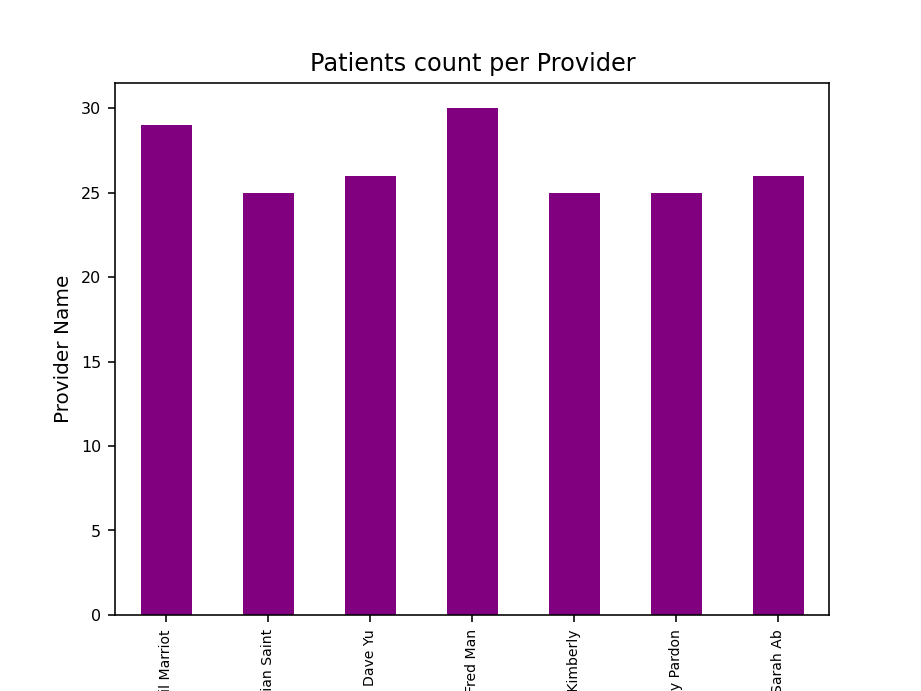

In [98]:
idf_amb_visits = amb_visits.interactive()
patients_provider = idf_provider.merge(idf_amb_visits, how='inner', on='ProviderID')
 
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=8)

provider_patient_count = patients_provider.groupby(['ProviderName']).size().plot(kind='bar', color='PURPLE', 
    xlabel='Patient Count', ylabel='Provider Name', align='center', title='Patients count per Provider')

provider_patient_count

In [95]:
template = pn.template.FastListTemplate(
    title='PROVIDERS', 
    sidebar=[pn.pane.Markdown("## Provider Details"),select_specialty],
    main=[pn.Row(pn.Column(provider_table.panel(width=600))),
    pn.Row(pn.Column(provider_patient_count.panel(width=600), margin=(0,25)))],
    accent_base_color="#A01346",header_background="#88d8b0"
)
template.show()

Launching server at http://localhost:53938
